<!-- Warning, README.md is autogenerated from README.ipynb, do not edit it directly -->

`pip install make_agents`

[![](https://github.com/sradc/make_agents/workflows/Python%20package/badge.svg?branch=main)](https://github.com/sradc/make_agents/commits/)

<p align="center">
  <img src="README_files/make_agents_logo.jpg" width=256>
</p>

# MakeAgents

MakeAgents is a micro framework for creating LLM-powered agents.
It consists of tools and a paridigm for creating agents.

## Quickstart examples

### Example 1: A simple conversational agent

In [7]:
import json
import pprint

import make_agents as ma

from pydantic import BaseModel, Field

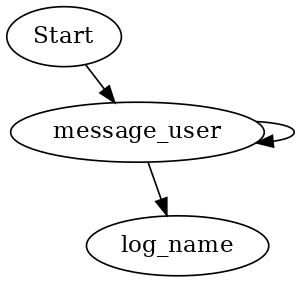

{ 'content': None,
  'function_call': { 'arguments': '{"next_function": "message_user"}',
                     'name': 'select_next_func'},
  'role': 'assistant'}

{ 'content': '{"next_function": "message_user"}',
  'name': 'select_next_func',
  'role': 'function'}

{ 'content': None,
  'function_call': { 'arguments': '{"question": "What is your first name?"}',
                     'name': 'message_user'},
  'role': 'assistant'}

{ 'content': '"Uh, well, it\'s Bill"',
  'name': 'message_user',
  'role': 'function'}

{ 'content': None,
  'function_call': { 'arguments': '{"next_function": "message_user"}',
                     'name': 'select_next_func'},
  'role': 'assistant'}

{ 'content': '{"next_function": "message_user"}',
  'name': 'select_next_func',
  'role': 'function'}

{ 'content': None,
  'function_call': { 'arguments': '{"question": "And what is your last name?"}',
                     'name': 'message_user'},
  'role': 'assistant'}

{ 'content': '"And that... would be BoBag

In [8]:
# Define the functions the agent will use


class MessageUserArg(BaseModel):
    question: str = Field(description="Question to ask user")


@ma.llm_func
def message_user(arg: MessageUserArg):
    """Send the user a message, and get their response."""
    response = ""
    while response == "":
        response = input(arg.question).strip()
    return response


class LogNameArg(BaseModel):
    first_name: str = Field(description="User's first name")
    last_name: str = Field(description="User's last name")


@ma.llm_func
def log_name(arg: LogNameArg):
    """Log the name of the user. Only do this if you are certain."""
    return {"first_name": arg.first_name, "last_name": arg.last_name}


# Define the agent, as a graph of functions
agent_graph = {
    ma.Start: [message_user],
    message_user: [message_user, log_name],
}
display(ma.draw_graph(agent_graph))

# Initialise the message stack with a system prompt
messages_init = [
    {
        "role": "system",
        "content": "Get the first and last name of the user.",
    }
]

# Run the agent
for messages in ma.run_agent(agent_graph, messages_init):
    pprint.pprint(messages[-1], indent=2)
    print()
print(f"Retrieved user_name: {json.loads(messages[-1]['content'])}")

### Notes:

Prompting has a big impact on the performance of the agent. The `llm_func` function names, Pydantic models and docstrings can all be considered part of the prompt.


### Dev setup

- Clone the repo and `cd` into it
- Run `poetry install`
- Run `poetry run pre-commit install`
